# NSW vs OSW confluence

In [55]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Replicate user classification

In [33]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)},
]

q.prepare_query(
    'nsw_osw_confluence/customer_classification.sql'
    ,params=params
    ,to_load_file='customer_classifcation'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/4b9172ef70db6922af59fd99318e2d5d4703ef8096615aaf99301599b967e24a


In [34]:
df.sort_values(by='start_date', ascending=True)

,start_date,variant,n_distinct_customers_first_exposure,n_customers_first_exposure
0,2023-09-29,Control Group,1,1
1,2023-09-30,Variant 1,1,1
2,2023-10-02,Control Group,1,1
3,2023-10-03,Control Group,1,1
4,2023-10-04,Control Group,1,1
5,2023-10-06,Control Group,1,1
6,2023-10-09,Control Group,1,1
7,2023-10-10,Control Group,1,1
8,2023-10-15,Control Group,1,1
9,2023-10-24,Control Group,1,1


# Replicate user classification evolution

In [56]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)},
]

q.prepare_query(
    'nsw_osw_confluence/customer_classification_evolution.sql'
    ,params=params
    ,to_load_file='customer_classifcation_evolution'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/a4b274a0d168c46fc38c0995cb698934cfc17c7a28302f4a8d38444407c586a7


In [59]:
# Pivot by variant
df_pivoted = df.pivot(index='start_date', columns='variant', values=['n_distinct_customers'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]

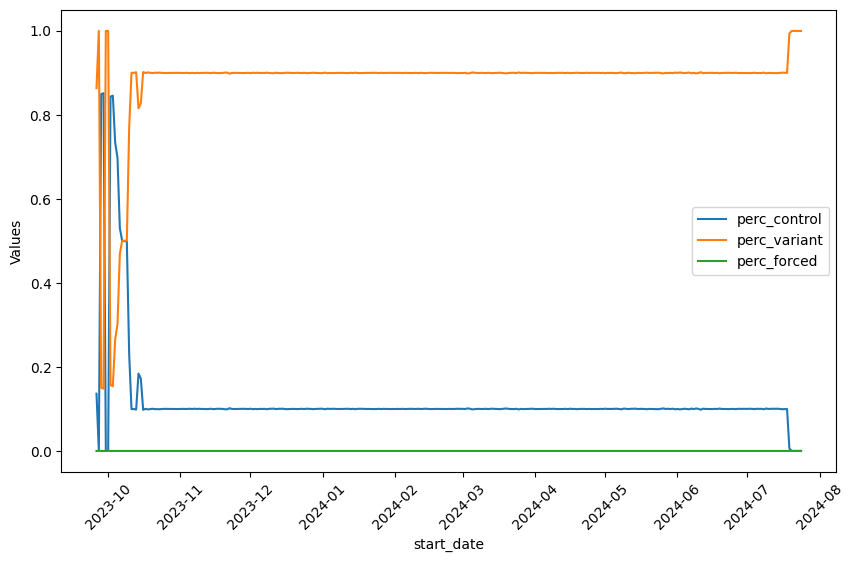

In [69]:
df_pivoted = df_pivoted.fillna(0)

df_pivoted['total'] = df_pivoted['n_distinct_customers__Control Group'] + df_pivoted['n_distinct_customers__Variant 1'] + df_pivoted['n_distinct_customers__forced_assignment']
df_pivoted['perc_control'] = df_pivoted['n_distinct_customers__Control Group']/df_pivoted['total']
df_pivoted['perc_variant'] = df_pivoted['n_distinct_customers__Variant 1']/df_pivoted['total']
df_pivoted['perc_forced'] = df_pivoted['n_distinct_customers__forced_assignment']/df_pivoted['total']


# Reset index to make p_creation_date a regular column
df_pivoted = df_pivoted.reset_index()

df_pivoted

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)
v.multiple_variable_lineplot(
    'start_date',
    ['perc_control','perc_variant','perc_forced']
)

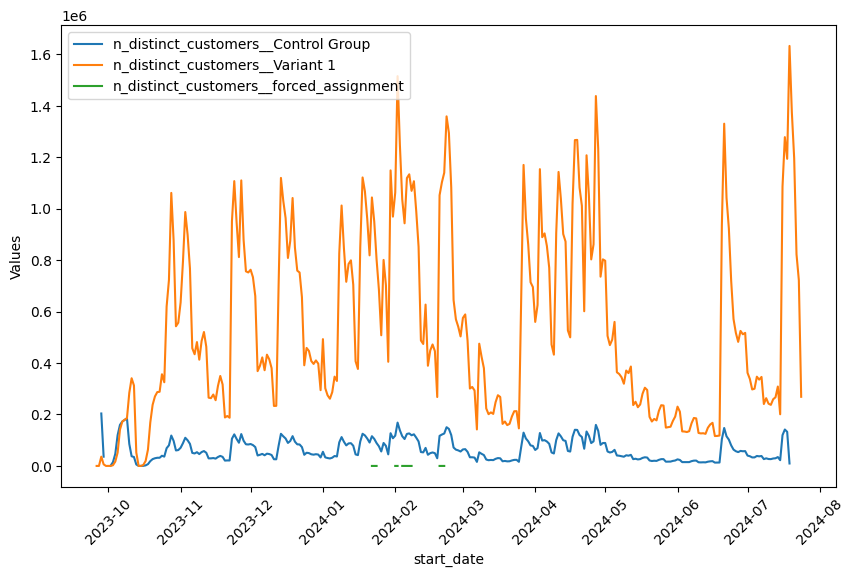

In [58]:

# Reset index to make p_creation_date a regular column
df_pivoted = df_pivoted.reset_index()

df_pivoted

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)
v.multiple_variable_lineplot(
    'start_date',
    ['n_distinct_customers__Control Group'
      ,'n_distinct_customers__Variant 1'
      ,'n_distinct_customers__forced_assignment']
)